In [1]:
%run INIT.ipynb

/Users/Martin/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from sklearn.model_selection import validation_curve as valcurv

In [10]:
means = []
cis = []
k = range(1,601,50)
y_real = [x for x in y_test]
for x in k:
    knn = KNNCLF(n_neighbors=x, n_jobs=-1, weights='uniform')
    knnscores = cross_val(knn, X_train, [x for x in y_train], cv=5)
    knnciRaw = stats.norm.interval(0.95, loc=knnscores.mean(), scale=knnscores.std())
    knnci = knnciRaw[1]-knnciRaw[0]
    knnscoreMean = knnscores.mean()

    means.append(knnscoreMean)
    cis.append(knnci)

In [ ]:
X_predict = X_test
y_real = [x for x in y_test]
X = X_train
y = [x for x in y_train]
knn = KNNCLF(n_neighbors=52, n_jobs=-1, weights='uniform')
y_ = knn.fit(X,y)

In [ ]:
knnscores = cross_val(knn, X_train, [x for x in y_train], cv=5)
knnciRaw = stats.norm.interval(0.95, loc=knnscores.mean(), scale=knnscores.std())
knnci = knnciRaw[1]-knnciRaw[0]
knnscoreMean = knnscores.mean()

In [ ]:
print('%0.003f +- %0.003f' % (knnscoreMean,knnci))

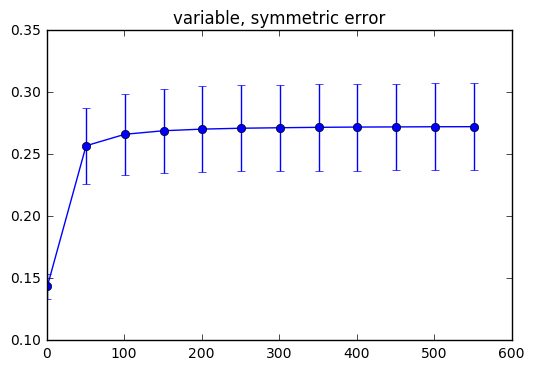

In [15]:
fig = plt.figure()
plt.errorbar(k, means, yerr=cis, fmt='-o')
plt.title('variable, symmetric error')
fig.savefig('k_means_errorbars.png')
plt.show()

In [3]:
knn = KNNCLF(weights='uniform', n_jobs=4)

In [ ]:
train_scores, test_scores = valcurv(knn, X_train, y_train, param_name='n_neighbors', param_range=range(1,601,50), cv=5, scoring='accuracy', n_jobs=1)

In [ ]:
param_range = range(1,51,10)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

trainciRaw = stats.norm.interval(0.95, loc=train_scores_mean, scale=train_scores_std)
trainci = trainciRaw[1]-trainciRaw[0]
testciRaw = stats.norm.interval(0.95, loc=test_scores_mean, scale=test_scores_std)
testci = testciRaw[1]-testciRaw[0]

In [ ]:
fig = plt.figure()
plt.title("Validation Curve with ANN")
plt.xlabel("# of neurons")
plt.ylabel("Accuracy (%)")
plt.ylim(0.2, 0.4)
lw = 4
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - trainci/2,
                 train_scores_mean + trainci/2, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Test score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - testci/2,
                 test_scores_mean + testci/2, alpha=0.1,
                 color="navy", lw=lw)
plt.legend(loc="best")
fig.savefig('ANN_config.png')
plt.show()